In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

file_name_1 = "gdrive/My Drive/Capstone/VideoDetails.csv"
file_name_2 = "gdrive/My Drive/Capstone/VideoStarted.csv"

data1 = pd.read_csv(file_name_1)
data2 = pd.read_csv(file_name_2)
data = pd.concat([data1,data2],ignore_index = True)
data.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [0]:
data1.shape

(3695451, 12)

In [0]:
data1['Date'] = data1['Date'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])

data1.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,2017/01/06,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [0]:
data1['Start_Time_hr'] = data1['Minute_Of_Day']//60
data1['Start_Time_min'] = data1['Minute_Of_Day']%60
data1['Start_Time_sec'] = data1['Second']
data1 = data1.drop(columns = 'Minute_Of_Day')
data1 = data1.drop(columns = 'Second')
data1['Start_Time_hr'] = data1['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
data1['Start_Time_min'] = data1['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
data1['Start_Time_sec'] =data1['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
data1['time'] = data1['Start_Time_hr'] + str(':') + data1['Start_Time_min'] + str(':') + data1['Start_Time_sec']
data1 = data1.drop(columns = ['Start_Time_hr','Start_Time_min','Start_Time_sec'])
data1.head(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,time
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20


In [0]:
data1['hour'] = pd.to_datetime(data1['Date'] + ' ' + data1['time'])


data1.head(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,time,hour
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00:00:20,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20,2017-01-06 00:00:20


In [0]:
def hr_func(ts):
    return ts.hour

data1['hour'] = data1['hour'].apply(hr_func)

In [0]:
data1['date-time'] = pd.to_datetime(data1['Date'] + ' ' + data1['time'])
data1.tail(5)

,UserId,Date,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,time,hour,date-time
3695446,869d1138b2967cd5b662e7ee55174de6,2017/06/12,35,Action,vod,Movies,1,1,1,6d808e3ba1da6f2c9052e99230c825a2,23:59:56,23,2017-06-12 23:59:56
3695447,81b41004ac9004a8caa0f306f638c15c,2017/06/12,160,Anime,vod,TV Shows,40,1,1,0cb11e85dc250c95e4cbe68e9a7b76b8,23:59:56,23,2017-06-12 23:59:56
3695448,c4a6ab8e18a305d72d7abf830ab80945,2017/06/12,35,Anime,vod,TV Shows,1,1,1,becd0625de9e7c0dd3b991a4e0a58e3a,23:59:56,23,2017-06-12 23:59:56
3695449,7b88c3934856eacad2d589f9359389aa,2017/06/12,40,Drama,vod,TV Shows,1,1,1,f2afbc37088e4a5a02dc01c9115e710c,23:59:56,23,2017-06-12 23:59:56
3695450,c4a6ab8e18a305d72d7abf830ab80945,2017/06/12,35,Anime,vod,TV Shows,1,1,1,66e251bf8a1769aa0bb56e80c252129e,23:59:56,23,2017-06-12 23:59:56


In [0]:
data1.drop(columns = ['Category'],inplace = True)
data1.head(5)

,UserId,Date,State,Genre,ProgramType,Country,Device,OS,VideoId,time,hour,date-time
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20


In [0]:
data1 = data1[data1.Country.isin([1,40,255])]
data1.head(5)

,UserId,Date,State,Genre,ProgramType,Country,Device,OS,VideoId,time,hour,date-time
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20


In [0]:
data1['Country-State']= data1['Country'].apply(lambda x:str(x)) + str('-') + data1['State'].apply(lambda x : str(x))
data1.head(5)

,UserId,Date,State,Genre,ProgramType,Country,Device,OS,VideoId,time,hour,date-time,Country-State
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,35,Drama,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,35,Horror,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,0,Drama,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,35,Drama,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35
4,435d41ae019cb8db785483793859c9a8,2017/01/06,35,Anime,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35


In [0]:
data1.drop(columns = ['Country','State'],inplace = True)
data1.head()

,UserId,Date,Genre,ProgramType,Device,OS,VideoId,time,hour,date-time,Country-State
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,Drama,TV Shows,2,1,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,Horror,Movies,1,1,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,Drama,TV Shows,1,1,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,Drama,TV Shows,1,1,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35
4,435d41ae019cb8db785483793859c9a8,2017/01/06,Anime,TV Shows,1,1,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35


In [0]:
data1.drop(columns = ['Device','OS'],inplace = True)
data1.head()

,UserId,Date,Genre,ProgramType,VideoId,time,hour,date-time,Country-State
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,Drama,TV Shows,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,Horror,Movies,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,Drama,TV Shows,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,Drama,TV Shows,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35
4,435d41ae019cb8db785483793859c9a8,2017/01/06,Anime,TV Shows,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35


In [0]:
may_data = data1.copy()
may_data['month'] = may_data['date-time'].dt.month
may_data = may_data[may_data.month == 5]
may_data.drop('month',axis = 1)


,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt
2722389,000111507a214a26efe459cb2807cd78,2017/05/23,82114e85b433b5b2f9e400b5a07dc8b8,20:49:32,20,2017-05-23 20:49:32,1-57,Drama - TV Shows
2722958,000111507a214a26efe459cb2807cd78,2017/05/23,82114e85b433b5b2f9e400b5a07dc8b8,20:57:24,20,2017-05-23 20:57:24,1-57,Drama - TV Shows
2775521,000111507a214a26efe459cb2807cd78,2017/05/24,82114e85b433b5b2f9e400b5a07dc8b8,21:32:52,21,2017-05-24 21:32:52,1-57,Drama - TV Shows
2424420,00015c69cccd32bcd323227b7140d8a8,2017/05/17,42d90a79258cb9bc8c0da5e0aab97237,14:41:08,14,2017-05-17 14:41:08,1-35,Drama - TV Shows
2424445,00015c69cccd32bcd323227b7140d8a8,2017/05/17,55c486872b4065c3ff256771e1e12729,14:41:56,14,2017-05-17 14:41:56,1-35,Drama - TV Shows
2424452,00015c69cccd32bcd323227b7140d8a8,2017/05/17,55c486872b4065c3ff256771e1e12729,14:42:04,14,2017-05-17 14:42:04,1-35,Drama - TV Shows
1720899,00016f6ad820aa24940343f837799519,2017/05/01,0cb11e85dc250c95e4cbe68e9a7b76b8,21:25:28,21,2017-05-01 21:25:28,1-35,Anime - TV Shows
1720941,00016f6ad820aa24940343f837799519,2017/05/01,82114e85b433b5b2f9e400b5a07dc8b8,21:25:56,21,2017-05-01 21:25:56,1-35,Drama - TV Shows
1720965,00016f6ad820aa24940343f837799519,2017/05/01,9cb3742fdad89dc66e329f70c84de85c,21:26:20,21,2017-05-01 21:26:20,1-35,Drama - Movies
1721410,00016f6ad820aa24940343f837799519,2017/05/01,ca19195ac5a690c5916df868a1a7e4e2,21:33:52,21,2017-05-01 21:33:52,1-35,Drama - Movies


In [0]:
data1['gpt']= data1['Genre'].apply(lambda x:str(x)) + str('-') + data1['ProgramType'].apply(lambda x : str(x))
data1.head(5)

,UserId,Date,Genre,ProgramType,VideoId,time,hour,date-time,Country-State,gpt
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,Drama,TV Shows,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35,Drama - TV Shows
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,Horror,Movies,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35,Horror - Movies
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,Drama,TV Shows,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0,Drama - TV Shows
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,Drama,TV Shows,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35,Drama - TV Shows
4,435d41ae019cb8db785483793859c9a8,2017/01/06,Anime,TV Shows,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35,Anime - TV Shows


In [0]:
data1.drop(columns = ['Genre','ProgramType'],inplace = True)
data1.head()

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35,Drama - TV Shows
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35,Horror - Movies
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0,Drama - TV Shows
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35,Drama - TV Shows
4,435d41ae019cb8db785483793859c9a8,2017/01/06,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35,Anime - TV Shows


In [0]:
data1['UserId'].nunique()

250826

In [0]:
data2 =data1.sort_values(by = 'date-time')
data2.head(20)

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt
0,dc93d200565e5bf6e6fc55adb1c5ba06,2017/01/06,1f2dc23e0d2415353982cfa38cbaf983,00:00:04,0,2017-01-06 00:00:04,1-35,Drama - TV Shows
1,12060efd8b68ea562b265d0129a8af1f,2017/01/06,6c95441f239cebf9930ac5932cc84a7f,00:00:16,0,2017-01-06 00:00:16,1-35,Horror - Movies
2,9151ab2a901458f27e36548d4a8dc011,2017/01/06,1af000794c63fa2722e22af609ff572c,00:00:20,0,2017-01-06 00:00:20,255-0,Drama - TV Shows
3,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,f053c42e98d50e06532ce8d65afb3ab3,00:00:20,0,2017-01-06 00:00:20,1-35,Drama - TV Shows
4,435d41ae019cb8db785483793859c9a8,2017/01/06,2a9d984659afc14f801548dd71ddad0e,00:00:20,0,2017-01-06 00:00:20,1-35,Anime - TV Shows
5,434200a07e2d14835580cee9ddcf978c,2017/01/06,8d03b652089819c4bc6a77ef653635ff,00:00:24,0,2017-01-06 00:00:24,255-0,Thriller - Movies
6,1faf0ce0b98e02e1568702f516f01a78,2017/01/06,6b14489f3e020c5748624098a605aa1e,00:00:28,0,2017-01-06 00:00:28,1-35,Drama - TV Shows
7,3ec691b9d2b5d53ef965fe59b1900b30,2017/01/06,7f28920fe8255272f3f408c4b2564868,00:00:40,0,2017-01-06 00:00:40,1-35,Drama - TV Shows
8,9151ab2a901458f27e36548d4a8dc011,2017/01/06,1af000794c63fa2722e22af609ff572c,00:00:44,0,2017-01-06 00:00:44,255-0,Drama - TV Shows
9,cc3c6d5497235af3c445f41296a4e81f,2017/01/06,662f197c76deabd3b56a6ed109c873b4,00:00:44,0,2017-01-06 00:00:44,255-0,Drama - Movies


In [0]:
data2 = data2.sort_values(by = ['UserId','date-time'])
data2.head(20)

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt
510196,0000146e97c32d369268e5ba5f4b907c,2017/02/23,f053c42e98d50e06532ce8d65afb3ab3,11:46:12,11,2017-02-23 11:46:12,1-36,Drama - TV Shows
510216,0000146e97c32d369268e5ba5f4b907c,2017/02/23,291075c45a4b30a53a3123d3a57f8432,11:48:40,11,2017-02-23 11:48:40,1-36,Drama - TV Shows
511180,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:12:00,14,2017-02-23 14:12:00,1-36,Drama - TV Shows
511197,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:14:32,14,2017-02-23 14:14:32,1-36,Drama - TV Shows
544074,0000146e97c32d369268e5ba5f4b907c,2017/02/28,6cdb56a8ec9941fe739ecf5b2c2803df,15:02:48,15,2017-02-28 15:02:48,1-36,Drama - TV Shows
446994,00001e3213a2159ed06f1db689c54fbb,2017/02/14,94e0e078a2107fd19e6b375e193c3a93,00:05:12,0,2017-02-14 00:05:12,40-33,Comedy - Movies
484465,00001e3213a2159ed06f1db689c54fbb,2017/02/19,ee9b05acd92bcc9b82a58c6c4f8ca610,08:36:44,8,2017-02-19 08:36:44,40-33,Anime - Channels
484467,00001e3213a2159ed06f1db689c54fbb,2017/02/19,ee9b05acd92bcc9b82a58c6c4f8ca610,08:37:04,8,2017-02-19 08:37:04,40-33,Anime - Channels
484468,00001e3213a2159ed06f1db689c54fbb,2017/02/19,94e0e078a2107fd19e6b375e193c3a93,08:37:28,8,2017-02-19 08:37:28,40-33,Comedy - Movies
1674228,00004010d92c2f13b824237bc323d58b,2017/04/30,edfe3711d865215486344ee2a545c0c1,21:39:00,21,2017-04-30 21:39:00,40-33,Anime - TV Shows


In [0]:
data2.shape

(3683365, 8)

In [0]:
data1 = data2.drop_duplicates()
data1.shape

(3426339, 8)

In [0]:
file_name_3 = "gdrive/My Drive/Capstone/Registration.csv"
df = pd.read_csv(file_name_3)
df = df.drop_duplicates()
df.shape



(327274, 9)

In [0]:
df['UserId'].nunique()

259318

In [0]:
df_main = (data1.merge(df[['UserId','Status']], on='UserId', how='left'))
df_main.Status = df_main.Status.replace({"Complete":"Completed"})
df_main.head()

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt,Status
0,0000146e97c32d369268e5ba5f4b907c,2017/02/23,f053c42e98d50e06532ce8d65afb3ab3,11:46:12,11,2017-02-23 11:46:12,1-36,Drama - TV Shows,Completed
1,0000146e97c32d369268e5ba5f4b907c,2017/02/23,291075c45a4b30a53a3123d3a57f8432,11:48:40,11,2017-02-23 11:48:40,1-36,Drama - TV Shows,Completed
2,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:12:00,14,2017-02-23 14:12:00,1-36,Drama - TV Shows,Completed
3,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:14:32,14,2017-02-23 14:14:32,1-36,Drama - TV Shows,Completed
4,0000146e97c32d369268e5ba5f4b907c,2017/02/28,6cdb56a8ec9941fe739ecf5b2c2803df,15:02:48,15,2017-02-28 15:02:48,1-36,Drama - TV Shows,Completed


In [0]:
df_main.Status = df_main.Status.fillna("Unknown")
df_main.isnull().sum()

UserId           0
Date             0
VideoId          0
time             0
hour             0
date-time        0
Country-State    0
gpt              0
Status           0
dtype: int64

In [0]:
s=df_main.UserId.value_counts().gt(3)
df_main1 = df_main.loc[df_main.UserId.isin(s[s].index)]
df_main1.head(20)

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt,Status
0,0000146e97c32d369268e5ba5f4b907c,2017/02/23,f053c42e98d50e06532ce8d65afb3ab3,11:46:12,11,2017-02-23 11:46:12,1-36,Drama - TV Shows,Completed
1,0000146e97c32d369268e5ba5f4b907c,2017/02/23,291075c45a4b30a53a3123d3a57f8432,11:48:40,11,2017-02-23 11:48:40,1-36,Drama - TV Shows,Completed
2,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:12:00,14,2017-02-23 14:12:00,1-36,Drama - TV Shows,Completed
3,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:14:32,14,2017-02-23 14:14:32,1-36,Drama - TV Shows,Completed
4,0000146e97c32d369268e5ba5f4b907c,2017/02/28,6cdb56a8ec9941fe739ecf5b2c2803df,15:02:48,15,2017-02-28 15:02:48,1-36,Drama - TV Shows,Completed
5,00001e3213a2159ed06f1db689c54fbb,2017/02/14,94e0e078a2107fd19e6b375e193c3a93,00:05:12,0,2017-02-14 00:05:12,40-33,Comedy - Movies,Completed
6,00001e3213a2159ed06f1db689c54fbb,2017/02/19,ee9b05acd92bcc9b82a58c6c4f8ca610,08:36:44,8,2017-02-19 08:36:44,40-33,Anime - Channels,Completed
7,00001e3213a2159ed06f1db689c54fbb,2017/02/19,ee9b05acd92bcc9b82a58c6c4f8ca610,08:37:04,8,2017-02-19 08:37:04,40-33,Anime - Channels,Completed
8,00001e3213a2159ed06f1db689c54fbb,2017/02/19,94e0e078a2107fd19e6b375e193c3a93,08:37:28,8,2017-02-19 08:37:28,40-33,Comedy - Movies,Completed
9,00004010d92c2f13b824237bc323d58b,2017/04/30,edfe3711d865215486344ee2a545c0c1,21:39:00,21,2017-04-30 21:39:00,40-33,Anime - TV Shows,Completed


In [0]:
df_main1.tail()

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt,Status
6018399,ffffd1caa4032372302ec30a5820d105,2017/04/04,faba83bcbab69403f5eee142d22dc6b8,20:05:04,20,2017-04-04 20:05:04,1-36,Horror - Movies,Completed
6018400,ffffd1caa4032372302ec30a5820d105,2017/04/04,faba83bcbab69403f5eee142d22dc6b8,20:05:12,20,2017-04-04 20:05:12,1-36,Horror - Movies,Completed
6018401,ffffd1caa4032372302ec30a5820d105,2017/04/04,faba83bcbab69403f5eee142d22dc6b8,21:52:00,21,2017-04-04 21:52:00,1-36,Horror - Movies,Completed
6018402,ffffd1caa4032372302ec30a5820d105,2017/04/04,faba83bcbab69403f5eee142d22dc6b8,21:52:04,21,2017-04-04 21:52:04,1-36,Horror - Movies,Completed
6018403,ffffd1caa4032372302ec30a5820d105,2017/04/04,faba83bcbab69403f5eee142d22dc6b8,21:53:28,21,2017-04-04 21:53:28,1-36,Horror - Movies,Completed


In [0]:
df_main.Status.value_counts()

Completed        3723953
Not Completed    1970178
Unknown           324275
Name: Status, dtype: int64

In [0]:
df_main.columns

Index(['UserId', 'Date', 'VideoId', 'time', 'hour', 'date-time',
       'Country-State', 'gpt', 'Status'],
      dtype='object')

In [0]:
data = data.sort_values(by = ['UserId'])


In [0]:
data1.shape

(3426339, 8)

In [0]:
data.head(15)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
511197,0000146e97c32d369268e5ba5f4b907c,20170223,854,32,36,Drama,vod,TV Shows,1,1,1,d96be0b1386c42092c10ba1bd6a64167
511180,0000146e97c32d369268e5ba5f4b907c,20170223,852,0,36,Drama,vod,TV Shows,1,1,1,d96be0b1386c42092c10ba1bd6a64167
510196,0000146e97c32d369268e5ba5f4b907c,20170223,706,12,36,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
544074,0000146e97c32d369268e5ba5f4b907c,20170228,902,48,36,Drama,vod,TV Shows,1,1,1,6cdb56a8ec9941fe739ecf5b2c2803df
3902566,0000146e97c32d369268e5ba5f4b907c,20170223,708,16,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598
510216,0000146e97c32d369268e5ba5f4b907c,20170223,708,40,36,Drama,vod,TV Shows,1,1,1,291075c45a4b30a53a3123d3a57f8432
446994,00001e3213a2159ed06f1db689c54fbb,20170214,5,12,33,Comedy,vod,Movies,40,1,1,94e0e078a2107fd19e6b375e193c3a93
484467,00001e3213a2159ed06f1db689c54fbb,20170219,517,4,33,Anime,linear,Channels,40,1,1,ee9b05acd92bcc9b82a58c6c4f8ca610
484465,00001e3213a2159ed06f1db689c54fbb,20170219,516,44,33,Anime,linear,Channels,40,1,1,ee9b05acd92bcc9b82a58c6c4f8ca610
484468,00001e3213a2159ed06f1db689c54fbb,20170219,517,28,33,Comedy,vod,Movies,40,1,1,94e0e078a2107fd19e6b375e193c3a93


In [0]:
data1.head()

,UserId,Date,VideoId,time,hour,date-time,Country-State,gpt
510196,0000146e97c32d369268e5ba5f4b907c,2017/02/23,f053c42e98d50e06532ce8d65afb3ab3,11:46:12,11,2017-02-23 11:46:12,1-36,Drama - TV Shows
510216,0000146e97c32d369268e5ba5f4b907c,2017/02/23,291075c45a4b30a53a3123d3a57f8432,11:48:40,11,2017-02-23 11:48:40,1-36,Drama - TV Shows
511180,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:12:00,14,2017-02-23 14:12:00,1-36,Drama - TV Shows
511197,0000146e97c32d369268e5ba5f4b907c,2017/02/23,d96be0b1386c42092c10ba1bd6a64167,14:14:32,14,2017-02-23 14:14:32,1-36,Drama - TV Shows
544074,0000146e97c32d369268e5ba5f4b907c,2017/02/28,6cdb56a8ec9941fe739ecf5b2c2803df,15:02:48,15,2017-02-28 15:02:48,1-36,Drama - TV Shows


In [0]:
data2 = data1.drop(columns = ['Date','time','hour'])
data2.head(1)

,UserId,VideoId,date-time,Country-State,gpt
510196,0000146e97c32d369268e5ba5f4b907c,f053c42e98d50e06532ce8d65afb3ab3,2017-02-23 11:46:12,1-36,Drama - TV Shows


In [0]:
data2['date-time'].min()

Timestamp('2017-01-06 00:00:04')

In [0]:
(data2['date-time'].max() - data2['date-time'].min()).days

157

In [0]:
data2['recency'] = (data2['date-time'].max() - data2['date-time']).dt.days


In [0]:

data2['recency'] = data2['recency'] + 1
data2.head(4)

,UserId,VideoId,date-time,Country-State,gpt,recency
510196,0000146e97c32d369268e5ba5f4b907c,f053c42e98d50e06532ce8d65afb3ab3,2017-02-23 11:46:12,1-36,Drama - TV Shows,110
510216,0000146e97c32d369268e5ba5f4b907c,291075c45a4b30a53a3123d3a57f8432,2017-02-23 11:48:40,1-36,Drama - TV Shows,110
511180,0000146e97c32d369268e5ba5f4b907c,d96be0b1386c42092c10ba1bd6a64167,2017-02-23 14:12:00,1-36,Drama - TV Shows,110
511197,0000146e97c32d369268e5ba5f4b907c,d96be0b1386c42092c10ba1bd6a64167,2017-02-23 14:14:32,1-36,Drama - TV Shows,110


In [0]:
data2['date'] = data2['date-time']
data2.head(5)

,UserId,VideoId,date-time,Country-State,gpt,recency,date
510196,0000146e97c32d369268e5ba5f4b907c,f053c42e98d50e06532ce8d65afb3ab3,2017-02-23 11:46:12,1-36,Drama - TV Shows,110,2017-02-23 11:46:12
510216,0000146e97c32d369268e5ba5f4b907c,291075c45a4b30a53a3123d3a57f8432,2017-02-23 11:48:40,1-36,Drama - TV Shows,110,2017-02-23 11:48:40
511180,0000146e97c32d369268e5ba5f4b907c,d96be0b1386c42092c10ba1bd6a64167,2017-02-23 14:12:00,1-36,Drama - TV Shows,110,2017-02-23 14:12:00
511197,0000146e97c32d369268e5ba5f4b907c,d96be0b1386c42092c10ba1bd6a64167,2017-02-23 14:14:32,1-36,Drama - TV Shows,110,2017-02-23 14:14:32
544074,0000146e97c32d369268e5ba5f4b907c,6cdb56a8ec9941fe739ecf5b2c2803df,2017-02-28 15:02:48,1-36,Drama - TV Shows,105,2017-02-28 15:02:48


In [0]:
 x= np.array([1,2,3])
 x.sum()

6

In [0]:
counts = data2['UserId'].value_counts()

data2 = data2[~data2['UserId'].isin(counts[counts < 4].index)]
data2.shape

(3208337, 7)

In [0]:
def weighted_timestamp_frequency_window(x):
  x= x.values
  y = len(x)*(len(x) +1)/2
  w = [i/y for i in range(len(x) -1)]
  diff = [(x[i + 1] - x[i]) for i in range(len(x)-1)] 
  a = np.array([w[i]*diff[i] for i in range(len(w))]).sum()
  return a

In [0]:
zeta = data2.drop(columns = ['Country-State','VideoId'])
zeta = zeta.groupby('UserId').agg({'date-time': 
                                   lambda x: 
                                   weighted_timestamp_frequency_window(x),
                                   'date' : 
                                   lambda x : x.max()
                                  })
zeta.head(5)

,date-time,date
UserId,,
0000146e97c32d369268e5ba5f4b907c,1 days 00:19:32.799999,2017-02-28 15:02:48
00001e3213a2159ed06f1db689c54fbb,0 days 00:00:06.800000,2017-02-19 08:37:28
00004010d92c2f13b824237bc323d58b,0 days 00:00:29.600000,2017-04-30 21:43:24
000076c7bbdf7e4568777134cc4bec56,0 days 04:04:13.599999,2017-06-12 23:09:52
0000e560394fce891dcf80218793d181,0 days 03:02:05.098901,2017-03-26 20:06:20


In [0]:
zeta = zeta.reset_index()
zeta['projected_date'] = zeta['date-time'] + zeta['date']
zeta.head()

,UserId,date-time,date,projected_date
0,0000146e97c32d369268e5ba5f4b907c,1 days 00:19:32.799999,2017-02-28 15:02:48,2017-03-01 15:22:20.799999999
1,00001e3213a2159ed06f1db689c54fbb,0 days 00:00:06.800000,2017-02-19 08:37:28,2017-02-19 08:37:34.800000000
2,00004010d92c2f13b824237bc323d58b,0 days 00:00:29.600000,2017-04-30 21:43:24,2017-04-30 21:43:53.600000000
3,000076c7bbdf7e4568777134cc4bec56,0 days 04:04:13.599999,2017-06-12 23:09:52,2017-06-13 03:14:05.599999998
4,0000e560394fce891dcf80218793d181,0 days 03:02:05.098901,2017-03-26 20:06:20,2017-03-26 23:08:25.098901093


In [0]:
def calculate_segment(x):
  x = x.values
  y = [1 if x[i] < 2 else 0 for i in range(len(x))]
  return y
zeta['segment'] = pd.Series(calculate_segment(zeta['date-time'].dt.days))
zeta.head(100)

,UserId,date-time,date,projected_date,segment
0,0000146e97c32d369268e5ba5f4b907c,1 days 00:19:32.799999,2017-02-28 15:02:48,2017-03-01 15:22:20.799999999,1
1,00001e3213a2159ed06f1db689c54fbb,0 days 00:00:06.800000,2017-02-19 08:37:28,2017-02-19 08:37:34.800000000,1
2,00004010d92c2f13b824237bc323d58b,0 days 00:00:29.600000,2017-04-30 21:43:24,2017-04-30 21:43:53.600000000,1
3,000076c7bbdf7e4568777134cc4bec56,0 days 04:04:13.599999,2017-06-12 23:09:52,2017-06-13 03:14:05.599999998,1
4,0000e560394fce891dcf80218793d181,0 days 03:02:05.098901,2017-03-26 20:06:20,2017-03-26 23:08:25.098901093,1
5,00015c69cccd32bcd323227b7140d8a8,2 days 15:41:49.846153,2017-05-17 14:42:04,2017-05-20 06:23:53.846153840,0
6,00016983c67858a09eb4b56cf4dc1a09,0 days 00:00:37.714285,2017-06-09 17:59:56,2017-06-09 18:00:33.714285712,1
7,00016f6ad820aa24940343f837799519,0 days 13:43:59.687840,2017-05-26 21:47:12,2017-05-27 11:31:11.687840263,1
8,0001a638c436640320470c397422d74c,0 days 00:00:21.599999,2017-04-10 16:20:20,2017-04-10 16:20:41.599999999,1
9,0002687e32b468bef8d9407f126f9d14,0 days 08:03:05.565217,2017-06-10 11:19:52,2017-06-10 19:22:57.565217346,1


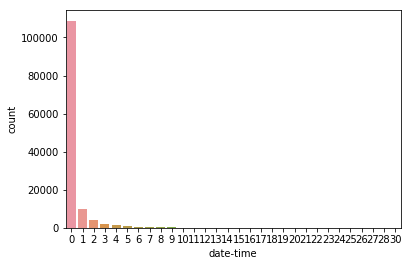

In [0]:
sns.countplot(zeta['date-time'].dt.days)

In [0]:
data3.head()

,Country-State,VideoId,gpt,recency
UserId,,,,
0000146e97c32d369268e5ba5f4b907c,1-36,5,Drama - TV Shows,109.000000
00001e3213a2159ed06f1db689c54fbb,40-33,4,"[ Anime - Channels , Comedy - Movies ]",115.250000
00004010d92c2f13b824237bc323d58b,40-33,4,Anime - TV Shows,44.000000
000076c7bbdf7e4568777134cc4bec56,1-35,15,Drama - TV Shows,2.066667
0000e560394fce891dcf80218793d181,1-40,13,Comedy - Movies,79.769231


In [0]:
data3.shape

(128995, 4)

In [0]:
data4 = data3.drop(columns = ['Country-State','gpt'])
data4 = data4.reset_index()
data4.head(5)
data4.head(5)




,UserId,VideoId,recency
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000
2,00004010d92c2f13b824237bc323d58b,4,44.000000
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667
4,0000e560394fce891dcf80218793d181,13,79.769231


In [0]:
data4 = data4.rename(columns={'VideoId': 'frequency'})
data4.head()

,UserId,frequency,recency
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000
2,00004010d92c2f13b824237bc323d58b,4,44.000000
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667
4,0000e560394fce891dcf80218793d181,13,79.769231


In [0]:
data4['r_quartile'] = pd.qcut(data4['recency'], 4, ['1','2','3','4'])
data4['f_quartile'] = pd.qcut(data4['frequency'], 4, ['4','3','2','1'])
data4.head()

,UserId,frequency,recency,r_quartile,f_quartile
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000,4,4
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000,4,4
2,00004010d92c2f13b824237bc323d58b,4,44.000000,2,4
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667,1,2
4,0000e560394fce891dcf80218793d181,13,79.769231,3,2


In [0]:
data4['RFM_Score'] = data4.r_quartile.astype(str)+ data4.f_quartile.astype(str) 
data4.head()

,UserId,frequency,recency,r_quartile,f_quartile,RFM_Score
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000,4,4,44
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000,4,4,44
2,00004010d92c2f13b824237bc323d58b,4,44.000000,2,4,24
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667,1,2,12
4,0000e560394fce891dcf80218793d181,13,79.769231,3,2,32


In [0]:
data4.RFM_Score.value_counts()

44    10956
11    10941
21    10123
34     9478
33     9108
43     8888
32     8052
22     7894
42     7764
12     7691
23     7079
14     6952
13     6931
24     6922
31     5790
41     4426
Name: RFM_Score, dtype: int64

In [0]:
data4['segment'] = data4.RFM_Score.map({'14': 1, '24': 1,'13': 1, '23': 1,'41': 3, '42': 3,'31': 3, '32': 3})
data4['segment'] = data4['segment'].fillna(2)
data4.head(5)

,UserId,frequency,recency,r_quartile,f_quartile,RFM_Score,segment
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000,4,4,44,2.0
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000,4,4,44,2.0
2,00004010d92c2f13b824237bc323d58b,4,44.000000,2,4,24,1.0
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667,1,2,12,2.0
4,0000e560394fce891dcf80218793d181,13,79.769231,3,2,32,3.0


In [0]:
data4.shape

(128995, 7)

In [0]:
Data = data4[['frequency','recency','segment']]
Data.head()

,frequency,recency,segment
0,5,109.000000,2.0
1,4,115.250000,2.0
2,4,44.000000,1.0
3,15,2.066667,2.0
4,13,79.769231,3.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
X = Data.drop(['segment'],axis=1)
y = Data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.fit_transform(X_test)
X_train

array([[-0.33241477, -0.1977782 ],
       [-0.41642336, -0.94522372],
       [-0.24840618, -0.3601193 ],
       ...,
       [ 4.2880578 , -0.38516757],
       [ 0.06662604, -0.09571106],
       [ 4.14104276, -0.43088455]])

In [0]:
print(y_test.value_counts())
y_train.value_counts()

2.0    22620
1.0     8323
3.0     7756
Name: segment, dtype: int64


2.0    52459
1.0    19561
3.0    18276
Name: segment, dtype: int64

In [0]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train , y_train)
y_pred=clf.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87      8323
         2.0       0.71      0.95      0.81     22620
         3.0       0.93      0.01      0.03      7756

    accuracy                           0.75     38699
   macro avg       0.83      0.61      0.57     38699
weighted avg       0.79      0.75      0.67     38699



In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#Parameter list
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

# using XGBoost
xgb_model = XGBClassifier(random_state = 0)
xgb_model.fit(X_train,y_train)
y_pred1 = xgb_model.predict(X_test)

#checking accuracy score:
xgb_score = accuracy_score(y_test,y_pred1)
print("accuracy score using xgboost :",xgb_score)

#confusion matrix
xgb_cm = confusion_matrix(y_test,y_pred1)
print('confusion matrix of xgboost',xgb_cm)

#classification report
xgb_cr = classification_report(y_test,y_pred1)
print("classification report of xgboost :",xgb_cr)

accuracy score using xgboost : 0.9999224786170186
confusion matrix of xgboost [[ 8323     0     0]
 [    0 22620     0]
 [    0     3  7753]]
classification report of xgboost :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      8323
         2.0       1.00      1.00      1.00     22620
         3.0       1.00      1.00      1.00      7756

    accuracy                           1.00     38699
   macro avg       1.00      1.00      1.00     38699
weighted avg       1.00      1.00      1.00     38699



In [0]:

import seaborn as sns
corr = Data.corr()

# plot the heatmap
print(corr)

           frequency   recency   segment
frequency   1.000000 -0.144939  0.200288
recency    -0.144939  1.000000  0.509285
segment     0.200288  0.509285  1.000000


In [0]:
file_name_3 = "gdrive/My Drive/Capstone/Registration.csv"

z = pd.read_csv(file_name_3)
z.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [0]:
merg = pd.merge(left=data4,right=z[['UserId','Status']],on='UserId',how='left')
merg.head()

,UserId,frequency,recency,r_quartile,f_quartile,RFM_Score,segment,Status
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000,4,4,44,2.0,Completed
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000,4,4,44,2.0,Completed
2,00004010d92c2f13b824237bc323d58b,4,44.000000,2,4,24,1.0,Completed
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667,1,2,12,2.0,Complete
4,0000e560394fce891dcf80218793d181,13,79.769231,3,2,32,3.0,Completed


In [0]:
merg['Status'].fillna('Not Completed',inplace = True)
merg.Status = merg.Status.replace({"Complete":"Completed"})
merg.isnull().sum()

UserId        0
frequency     0
recency       0
r_quartile    0
f_quartile    0
RFM_Score     0
segment       0
Status        0
dtype: int64

In [0]:
merg.head()

,UserId,frequency,recency,r_quartile,f_quartile,RFM_Score,segment,Status
0,0000146e97c32d369268e5ba5f4b907c,5,109.000000,4,4,44,2.0,Completed
1,00001e3213a2159ed06f1db689c54fbb,4,115.250000,4,4,44,2.0,Completed
2,00004010d92c2f13b824237bc323d58b,4,44.000000,2,4,24,1.0,Completed
3,000076c7bbdf7e4568777134cc4bec56,15,2.066667,1,2,12,2.0,Completed
4,0000e560394fce891dcf80218793d181,13,79.769231,3,2,32,3.0,Completed
